In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

0        chrX
1    67542992
2    67545034
3          AR
Name: 896, dtype: object
0        chr6
1    31896786
2    31928728
3          C2
Name: 2030, dtype: object
0      chr19
1    6719650
2    6721679
3         C3
Name: 2106, dtype: object
0         chr9
1    121049273
2    121051273
3           C5
Name: 2155, dtype: object
0        chr5
1    41212489
2    41214526
3          C6
Name: 2182, dtype: object
0        chr5
1    40908498
2    40910498
3          C7
Name: 2212, dtype: object
0        chr5
1    39363560
2    39365560
3          C9
Name: 2258, dtype: object
0         chr3
1    149220823
2    149223002
3           CP
Name: 3659, dtype: object
0       chr12
1    56299327
2    56301376
3          CS
Name: 3798, dtype: object
0       chr11
1    46718215
2    46720215
3          F2
Name: 5307, dtype: object
0        chr1
1    94531368
2    94542756
3          F3
Name: 5312, dtype: object
0         chr1
1    169585456
2    169587482
3           F5
Name: 5313, dtype: object
0        

NameError: name 'plt' is not defined

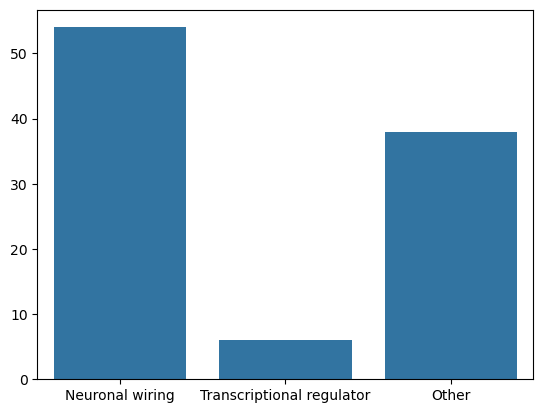

In [7]:
blacklist = ["SHCBP1", "TP53TG3C", "SPATA31A5", "SPATA31A6", "FCGR1B", "PPIAL4C", "ALG10B" "ALG10", "PROS1", "OR4C46", "OR4C12", "ZNF33B", \
            "POTEC", "ZNF716", "ZNF727", "TEKT4", "RPIA", "SPIN4", "ZXDA", "LOC441155", "PRIM2", "MTRNR2L1", "ZNF337", "ZNF254", "DEFB115", \
            "UQCRFS1", "ZNF254", "EMB", "ALG10", "ALG10B", "WSB1", "ZNF37A", "SPIDR", "HGSNAT", "POTED"]

v = pd.read_csv("Human_Promoters_Ortho_Sorted_hg38.sort.bed", sep = "\t", header = None)
out = []
for i in np.unique(v[3]):
    x = v[v[3] == i].copy()
    if x.shape[0] == 1:
        out.append(list(x.loc[x.index[0]]))
    else:
        out.append([list(x[0])[0], min(x[1]), max(x[2]), list(x[3])[0]])
vn = pd.DataFrame(out)

out = []

for index, row in vn.iterrows():
    try:
        if row[3][1] != "-" and row[3][2] != "-":
            out.append(row)
    except:
        print(row)
        out.append(row)

vn = pd.DataFrame(out)


outn = []
for i in np.unique(vn[0]):
    x = vn[vn[0] == i].copy()
    
    x = x.sort_values(1)
    x.index = list(range(len(x.index)))
    for j in range(1, len(x.index) - 1):
        dist1 = float(x.loc[j][1]) - float(x.loc[j-1][1])
        dist2 = float(x.loc[j+1][2]) - float(x.loc[j][2])
        dist = dist1 + dist2 + 2000
        outn.append([str(x.loc[j][3]), dist])
df = pd.DataFrame(outn)

df = df[df[1] > 0]

df = df[~df[0].isin(blacklist)]

wiring = ["PCDH7", "PCDH9", "LPHN3", "NCAM2", "PCDH17", "PCDH20", "CDH9", "CDH8", "FLRT2", "EPHA3", "CDH18", "HCN1", "SLITRK5", "GPC5", \
         "LRRC4C", "TENM3", "SLITRK1", "SORCS1", "CADM2", "PCDH10", "LRFN5", "EPHA7", "LPHN2", "LRRTM1", "CNTNAP5" "EFNA5", "TENM2", "OLFM4", \
         "ROBO1", "NRXN1", "CDH6", "CNTNAP3B", "CSMD1", "CSMD3", "CDH11", "CNTN5", "LINGO2", "TENM4", "LRRTM3", "LRP1B", \
         "PCDH18", "ROBO2", "CDH2", "NLGN4Y", "SLITRK6", "ALCAM", "CNTNAP2", "OTOL1", "EPHA6", "GRID2", "PCDH19", "NXPH2", \
         "NRG3", "PTPRD", "CDH12", "CNTN5", "CDH11"]
other = ["ROCK1", "KHDRBS2", "ARAP2", "PIK3C3", "BRINP3", "GBE1", "CELF4", "AGA", "RAG2", "MRPL39", "KLHL1", "ACO1", "TECRL", "NUDT12", "SPRY2", "PABPC4L", \
        "IGFBP7", "SUCLG1", "STIM2", "SEL1L", "C4orf33", "TYRP1", "GRIK2", "DPP10", "FSTL5", "SLC39A10", "MAT2B", "TMEFF2", \
        "KHDRBS3", "PLA2G4A", "KCNV1", "KLHL4", "RPA4", "NOVA1", "SI", "REEP3", "NAALADL2", "HACE1"]
tf = ["FOXD4L2", "AUTS2", "TGIF2LX", "TBL1XR1", "ZEB2", "CDY2B"]

print(len(wiring), len(other), len(tf))

sns.barplot({"Neuronal wiring":54, "Transcriptional regulator":6, "Other":38})
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.ylabel("Percentage of genes", size = 14)
plt.xlabel("Functional category", size = 14)
plt.title("Percentage of top 100 largest gene deserts", size = 16)



In [5]:
wiring = ["PCDH7", "PCDH9", "LPHN3", "NCAM2", "PCDH17", "PCDH20", "CDH9", "CDH8", "FLRT2", "EPHA3", "CDH18", "HCN1", "SLITRK5", "GPC5", \
         "LRRC4C", "TENM3", "SLITRK1", "SORCS1", "CADM2", "PCDH10", "LRFN5", "EPHA7", "LPHN2", "LRRTM1", "CNTNAP5" "EFNA5", "TENM2", "OLFM4", \
         "ROBO1", "NRXN1", "CDH6", "CNTNAP3B", "CSMD1", "CSMD3", "CDH11", "CNTN5", "LINGO2", "TENM4", "LRRTM3", "LRP1B", \
         "PCDH18", "ROBO2", "CDH2", "NLGN4Y", "SLITRK6", "ALCAM", "CNTNAP2", "OTOL1", "EPHA6", "GRID2", "PCDH19", "NXPH2", \
         "NRG3", "PTPRD", "CDH12", "CNTN5", "CDH11"]

for gene in wiring:
    if not gene.startswith("PCDH") and not gene.startswith("CDH") and not gene.startswith("TEN") and not gene.startswith("LPHN") and not gene.startswith("EPH") and not gene.startswith("SLIT") and not gene.startswith("ROBO")and not gene.startswith("NRXN"):
        if not gene.startswith("FLRT") and not gene.startswith("CNTN") and not gene.startswith("CSMD"):
            print(gene)

NCAM2
HCN1
GPC5
LRRC4C
SORCS1
CADM2
LRFN5
LRRTM1
OLFM4
LINGO2
LRRTM3
LRP1B
NLGN4Y
ALCAM
OTOL1
GRID2
NXPH2
NRG3
PTPRD
